In [1]:
import numpy as np
import random

In [2]:
from search import *
from img import show_map, display_visual, heatmap, plot_NQueens

In [3]:
romania_map = UndirectedGraph(dict(
    Arad=dict(Zerind=75, Sibiu=140, Timisoara=118),
    Bucharest=dict(Urziceni=85, Pitesti=101, Giurgiu=90, Fagaras=211),
    Craiova=dict(Drobeta=120, Rimnicu=146, Pitesti=138),
    Drobeta=dict(Mehadia=75),
    Eforie=dict(Hirsova=86),
    Fagaras=dict(Sibiu=99),
    Hirsova=dict(Urziceni=98),
    Iasi=dict(Vaslui=92, Neamt=87),
    Lugoj=dict(Timisoara=111, Mehadia=70),
    Oradea=dict(Zerind=71, Sibiu=151),
    Pitesti=dict(Rimnicu=97),
    Rimnicu=dict(Sibiu=80),
    Urziceni=dict(Vaslui=142)))

romania_map.locations = dict(
    Arad=(91, 492), Bucharest=(400, 327), Craiova=(253, 288),
    Drobeta=(165, 299), Eforie=(562, 293), Fagaras=(305, 449),
    Giurgiu=(375, 270), Hirsova=(534, 350), Iasi=(473, 506),
    Lugoj=(165, 379), Mehadia=(168, 339), Neamt=(406, 537),
    Oradea=(131, 571), Pitesti=(320, 368), Rimnicu=(233, 410),
    Sibiu=(207, 457), Timisoara=(94, 410), Urziceni=(456, 350),
    Vaslui=(509, 444), Zerind=(108, 531))

In [4]:
romania_locations = romania_map.locations
print(romania_locations)

{'Arad': (91, 492), 'Bucharest': (400, 327), 'Craiova': (253, 288), 'Drobeta': (165, 299), 'Eforie': (562, 293), 'Fagaras': (305, 449), 'Giurgiu': (375, 270), 'Hirsova': (534, 350), 'Iasi': (473, 506), 'Lugoj': (165, 379), 'Mehadia': (168, 339), 'Neamt': (406, 537), 'Oradea': (131, 571), 'Pitesti': (320, 368), 'Rimnicu': (233, 410), 'Sibiu': (207, 457), 'Timisoara': (94, 410), 'Urziceni': (456, 350), 'Vaslui': (509, 444), 'Zerind': (108, 531)}


In [6]:
node_colors = {node: 'white' for node in romania_map.locations.keys()}
node_positions = romania_map.locations
node_label_pos = {k: [v[0], v[1] - 10] for k, v in romania_map.locations.items()}
edge_weights = {(k, k2) : v2 for k, v in romania_map.graph_dict.items() for k2, v2 in v.items()}

romania_graph_data = {
    'graph_dict': romania_map.graph_dict,
    'node_colors': node_colors,
    'node_positions': node_positions,
    'node_label_positions': node_label_pos,
    'edge_weights': edge_weights
}

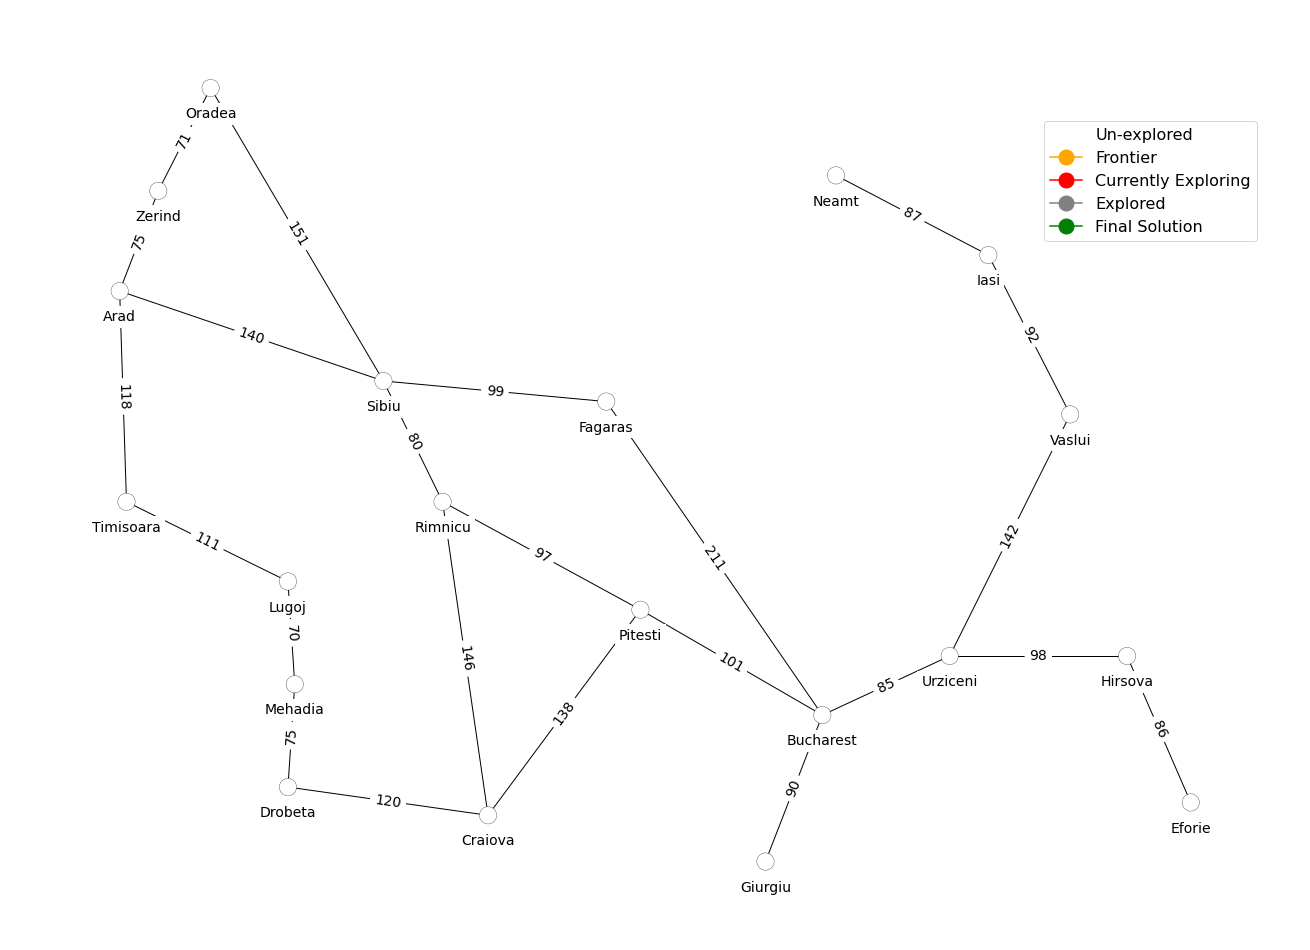

In [7]:
show_map(romania_graph_data)

In [7]:
# class VacuumAgent(SimpleProblemSolvingAgentProblem):
#     def update_state(self, state, percept):
#         return percept
    
#     def formula_goal(self, state):
        

## 1. BREADTH-FIRST TREE SEARCH

In [7]:
def tree_breadth_search_for_vis(problem):
    iterations = 0
    all_node_colors = []
    node_colors = {k: 'white' for k in problem.graph.nodes()}
    
    frontier = deque([Node(problem.initial)])
    
    node_colors[Node(problem.initial).state] = "orange"
    iterations += 1
    all_node_colors.append(dict(node_colors))
    
    while frontier:
        node = frontier.popleft()
        
        node_colors[node.state] = "red"
        iterations += 1
        all_node_colors.append(dict(node_colors))
        
        if problem.goal_test(node.state):
            node_colors[node.state] = "green"
            iterations += 1
            all_node_colors.append(dict(node_colors))
            return (iterations, all_node_colors, node)
        
        frontier.extend(node.expand(problem))
        
        for n in node.expand(problem):
            node_colors[n.state] = "orange"
            iterations += 1
            all_node_colors.append(dict(node_colors))
            
        node_colors[node.state] = "gray"
        iterations += 1
        all_node_colors.append(dict(node_colors))
        
    return None

def breadth_first_tree_search(problem):
    iterations, all_node_colors, node = tree_breadth_search_for_vis(problem)
    return (iterations, all_node_colors, node)

In [8]:
all_node_colors = []
romania_problem = GraphProblem('Arad', 'Bucharest', romania_map)
a, b, c = breadth_first_tree_search(romania_problem)
display_visual(romania_graph_data, user_input=False, algorithm=breadth_first_tree_search, problem=romania_problem)

interactive(children=(IntSlider(value=0, description='iteration', max=1), Output()), _dom_classes=('widget-int…

interactive(children=(ToggleButton(value=False, description='visualize'), Output()), _dom_classes=('widget-int…

## 2. DEPTH-FIRST TREE SEARCH

In [9]:
def tree_depth_search_for_vis(problem):
    iterations = 0
    all_node_colors = []
    node_colors = {k : 'white' for k in problem.graph.nodes()}
    
    frontier = [Node(problem.initial)]
    
    node_colors[Node(problem.initial).state] = "orange"
    iterations += 1
    all_node_colors.append(dict(node_colors))
        
    while frontier:
        # print('start')
        node = frontier.pop()
        # print(node)
        
        node_colors[node.state] = "red"
        iterations += 1
        all_node_colors.append(dict(node_colors))
        
        if problem.goal_test(node.state):
            node_colors[node.state] = "green"
            iterations += 1
            all_node_colors.append(dict(node_colors))
            return(iterations, all_node_colors, node)
                
        frontier.extend(node.expand(problem))
           
        for n in node.expand(problem):
            node_colors[n.state] = "orange"
            iterations += 1
            all_node_colors.append(dict(node_colors))

        node_colors[node.state] = "gray"
        iterations += 1
        all_node_colors.append(dict(node_colors))
        
    return None


def depth_first_tree_search(problem):
    iterations, all_node_colors, node = tree_depth_search_for_vis(problem)
    return(iterations, all_node_colors, node)

In [10]:
# all_node_colors = []
# romania_problem = GraphProblem('Arad', 'Bucharest', romania_map)
# display_visual(romania_graph_data, user_input=False, algorithm=depth_first_tree_search, problem=romania_problem)

## 3. BREADTH-FIRST GRAPH SEARCH

In [11]:
def breadth_first_search_graph(problem):
    iterations = 0
    all_node_colors = []
    node_colors = {k: 'white' for k in problem.graph.nodes()}
    
    node = Node(problem.initial)
    
    node_colors[node.state] = "red"
    iterations += 1
    all_node_colors.append(dict(node_colors))
    
    if problem.goal_test(node.state):
        node_colors[node.state] = "green"
        iterations += 1
        all_node_colors.append(dict(node_colors))
        return (iterations, all_node_colors, node)
    
    frontier = deque([node])
    
    node_colors[node.state] = "orange"
    iterations += 1
    all_node_colors.append(dict(node_colors))
    
    explored = set()
    while frontier:
        node = frontier.popleft()
        node_colors[node.state] = "red"
        iterations += 1
        all_node_colors.append(dict(node_colors))
        
        explored.add(node.state)
        
        for child in node.expand(problem):
            if child.state not in explored and child not in frontier:
                if problem.goal_test(child.state):
                    node_colors[child.state] = "green"
                    iterations += 1
                    all_node_colors.append(dict(node_colors))
                    return (iterations, all_node_colors, child)
                frontier.append(child)
                
                node_colors[child.state] = "orange"
                iterations += 1
                all_node_colors.append(dict(node_colors))
                
        node_colors[node.state] = "gray"
        iterations += 1
        all_node_colors.append(dict(node_colors))
    return None

In [12]:
all_node_colors = []
romania_problem = GraphProblem('Arad', 'Bucharest', romania_map)
display_visual(romania_graph_data, user_input=False, 
               algorithm=breadth_first_search_graph, 
               problem=romania_problem)

interactive(children=(IntSlider(value=0, description='iteration', max=1), Output()), _dom_classes=('widget-int…

interactive(children=(ToggleButton(value=False, description='visualize'), Output()), _dom_classes=('widget-int…

## 4. DEPTH-FIRST GRAPH SEARCH

In [13]:
def graph_search_for_vis(problem):
    iterations = 0
    all_node_colors = []
    node_colors = {k: 'white' for k in problem.graph.nodes()}
    
    frontier = [Node(problem.initial)]
    explored = set()
    
    node_colors[Node(problem.initial).state] = "orange"
    iterations += 1
    all_node_colors.append(dict(node_colors))
    
    while frontier:
        node = frontier.pop()
        
        node_colors[node.state] = "red"
        iterations += 1
        all_node_colors.append(dict(node_colors))
        
        if problem.goal_test(node.state):
            node_colors[node.state] = "green"
            iterations += 1
            all_node_colors.append(dict(node_colors))
            return (iterations, all_node_colors, node)
        
        explored.add(node.state)
        
        frontier.extend(child for child in node.expand(problem) if child.state not in explored and child not in frontier)
        
        for n in frontier:
            node_colors[n.state] = "orange"
            iterations += 1
            all_node_colors.append(dict(node_colors))
                
        node_colors[node.state] = "gray"
        iterations += 1
        all_node_colors.append(dict(node_colors))
    return None

def depth_first_graph_search(problem):
    iterations, all_node_colors, node = graph_search_for_vis(problem)
    return (iterations, all_node_colors, node)

In [14]:
all_node_colors = []
romania_problem = GraphProblem('Arad', 'Bucharest', romania_map)
display_visual(romania_graph_data, user_input=False, 
               algorithm=depth_first_graph_search, 
               problem=romania_problem)

interactive(children=(IntSlider(value=0, description='iteration', max=1), Output()), _dom_classes=('widget-int…

interactive(children=(ToggleButton(value=False, description='visualize'), Output()), _dom_classes=('widget-int…

## 5. BEST FIRST SEARCH

In [15]:
def best_first_graph_search_for_vis(problem, f):
    iterations = 0
    all_node_colors = []
    node_colors = {k: 'white' for k in problem.graph.nodes()}
    
    f = memoize(f, 'f')
    node = Node(problem.initial)
    
    node_colors[node.state] = "red"
    iterations += 1
    all_node_colors.append(dict(node_colors))
    
    if problem.goal_test(node.state):
        node_colors[node.state] = "green"
        iterations += 1
        all_node_colors.append(dict(node_colors))
        return (iterations, all_node_colors, node)
    
    frontier = PriorityQueue('min', f)
    frontier.append(node)
    
    node_colors[node.state] = "orange"
    iterations += 1
    all_node_colors.append(dict(node_colors))
    
    explored = set()
    while frontier:
        node = frontier.pop()
        
        node_colors[node.state] = "red"
        iterations += 1
        all_node_colors.append(dict(node_colors))
        
        if problem.goal_test(node.state):
            node_colors[node.state] = "green"
            iterations += 1
            all_node_colors.append(dict(node_colors))
            return (iterations, all_node_colors, node)
        
        explored.add(node.state)
        for child in node.expand(problem):
            if child.state not in explored and child not in frontier:
                frontier.append(child)
                node_colors[child.state] = "orange"
                iterations += 1
                all_node_colors.append(dict(node_colors))
            elif child in frontier:
                incumbent = frontier[child]
                if f(child) < incumbent:
                    del frontier[child]
                    frontier.append(child)
                    node_colors[child.state] = "orange"
                    iterations += 1
                    all_node_colors.append(dict(node_colors))
                    
        node_colors[node.state] = "gray"
        iterations += 1
        all_node_colors.append(dict(node_colors))
    return None

## 6. UNIFORM COST SEARCH

In [16]:
def uniform_cost_search_graph(problem):
    iterations, all_node_colors, node = best_first_graph_search_for_vis(problem, lambda node: node.path_cost)
    return (iterations, all_node_colors, node)

In [17]:
all_node_colors = []
romania_problem = GraphProblem('Arad', 'Bucharest', romania_map)
display_visual(romania_graph_data, user_input=False, 
               algorithm=uniform_cost_search_graph, 
               problem=romania_problem)

interactive(children=(IntSlider(value=0, description='iteration', max=1), Output()), _dom_classes=('widget-int…

interactive(children=(ToggleButton(value=False, description='visualize'), Output()), _dom_classes=('widget-int…

## 7. DEPTH LIMITED SEARCH

In [18]:
def depth_limited_search_graph(problem, limit=-1):
    iterations = 0
    all_node_colors = []
    node_colors = {k: 'white' for k in problem.graph.nodes()}
    
    frontier = [Node(problem.initial)]
    explored = set()
    
    cutoff_occurred = False
    node_colors[Node(problem.initial).state] = "orange"
    iterations += 1
    all_node_colors.append(dict(node_colors))
    
    while frontier:
        node = frontier.pop()
        
        node_colors[node.state] = "red"
        iterations += 1
        all_node_colors.append(dict(node_colors))
        
        if problem.goal_test(node.state):
            node_colors[node.state] = "green"
            iterations += 1
            all_node_colors.append(dict(node_colors))
            return (iterations, all_node_colors, node)
        elif limit >= 0:
            cutoff_occurred = True
            limit += 1
            all_node_colors.pop()
            iterations -= 1
            node_colors[node.state] = "gray"
            
        explored.add(node.state)
        frontier.extend(child for child in node.expand(problem) if child.state not in explored and child not in frontier)
        
        for n in frontier:
            limit -= 1
            node_colors[n.state] = "orange"
            iterations += 1
            all_node_colors.append(dict(node_colors))
            
        node_colors[node.state] = "gray"
        iterations += 1
        all_node_colors.append(dict(node_colors))
        
    return 'cutoff' if cutoff_occurred else None

def depth_limited_search_for_vis(problem):
    iterations, all_node_colors, node = depth_limited_search_graph(problem)
    return (iterations, all_node_colors, node)

In [19]:
all_node_colors = []
romania_problem = GraphProblem('Arad', 'Bucharest', romania_map)
display_visual(romania_graph_data, user_input=False, 
               algorithm=depth_limited_search_for_vis, 
               problem=romania_problem)

interactive(children=(IntSlider(value=0, description='iteration', max=1), Output()), _dom_classes=('widget-int…

interactive(children=(ToggleButton(value=False, description='visualize'), Output()), _dom_classes=('widget-int…

## 8. ITERATIVE DEEPENING SEARCH

In [20]:
def iterative_deepening_search_for_vis(problem):
    for depth in range(sys.maxsize):
        iterations, all_node_colors, node = depth_limited_search_for_vis(problem)
        if iterations:
            return (iterations, all_node_colors, node)

In [21]:
all_node_colors = []
romania_problem = GraphProblem('Arad', 'Bucharest', romania_map)
display_visual(romania_graph_data, user_input=False, 
               algorithm=iterative_deepening_search_for_vis, 
               problem=romania_problem)

interactive(children=(IntSlider(value=0, description='iteration', max=1), Output()), _dom_classes=('widget-int…

interactive(children=(ToggleButton(value=False, description='visualize'), Output()), _dom_classes=('widget-int…

## 9. GREEDY BEST FIRST SEARCH

In [22]:
def greedy_best_first_search(problem, h=None):
    h = memoize(h or problem.h, 'h')
    iterations, all_node_colors, node = best_first_graph_search_for_vis(problem, lambda n: h(n))
    return (iterations, all_node_colors, node)

In [23]:
all_node_colors = []
romania_problem = GraphProblem('Arad', 'Bucharest', romania_map)
display_visual(romania_graph_data, user_input=False, 
               algorithm=greedy_best_first_search, 
               problem=romania_problem)

interactive(children=(IntSlider(value=0, description='iteration', max=1), Output()), _dom_classes=('widget-int…

interactive(children=(ToggleButton(value=False, description='visualize'), Output()), _dom_classes=('widget-int…

## 10. A* SEARCH

In [24]:
def astar_search_graph(problem, h=None):
    h = memoize(h or problem.h, 'h')
    iterations, all_node_colors, node = best_first_graph_search_for_vis(problem, lambda n: n.path_cost + h(n))
    return (iterations, all_node_colors, node)

In [25]:
all_node_colors = []
romania_problem = GraphProblem('Arad', 'Bucharest', romania_map)
display_visual(romania_graph_data, user_input=False, 
               algorithm=astar_search_graph, 
               problem=romania_problem)

interactive(children=(IntSlider(value=0, description='iteration', max=1), Output()), _dom_classes=('widget-int…

interactive(children=(ToggleButton(value=False, description='visualize'), Output()), _dom_classes=('widget-int…

## 11. RECURSIVE BEST FIRST SEARCH

In [7]:
def recursive_best_first_search_for_vis(problem, h=None):
    iterations = 0
    all_node_colors = []
    node_colors = {k: 'white' for k in problem.graph.nodes()}
    
    h = memoize(h or problem.h, 'h')
    
    def RBFS(problem, node, flimit):
        nonlocal iterations
        def color_city_and_update_map(node, color):
            node_colors[node.state] = color
            nonlocal iterations
            iterations += 1
            all_node_colors.append(dict(node_colors))
            
        if problem.goal_test(node.state):
            color_city_and_update_map(node, 'green')
            return (iterations, all_node_colors, node), 0
        
        successors = node.expand(problem)
        if len(successors) == 0:
            color_city_and_update_map(node, 'gray')
            return (iterations, all_node_colors, None), np.inf
        
        for s in successors:
            color_city_and_update_map(s, 'orange')
            s.f = max(s.path_cost + h(s), node.f)
            
        while True or iterations == 100:
            successors.sort(key=lambda x: x.f)
            best = successors[0]
            if best.f > flimit:
                color_city_and_update_map(node, 'gray')
                return (iterations, all_node_colors, None), best.f
            
            if len(successors) > 1:
                alternative = successors[1].f
            else:
                alternative = np.inf
                
            node_colors[node.state] = 'gray'
            node_colors[best.state] = 'red'
            iterations += 1
            all_node_colors.append(dict(node_colors))
            result, best.f  = RBFS(problem, best, min(flimit, alternative))
            if result[2] is not None:
                color_city_and_update_map(node, 'green')
                return result, best.f
            else:
                color_city_and_update_map(node, 'red')
                
    node = Node(problem.initial)
    node.f = h(node)
        
    node_colors[node.state] = 'red'
    iterations += 1
    all_node_colors.append(dict(node_colors))
    result, bestf = RBFS(problem, node, np.inf)
        
    return result

In [8]:
all_node_colors = []
romania_problem = GraphProblem('Arad', 'Bucharest', romania_map)
display_visual(romania_graph_data, user_input=False,
               algorithm=recursive_best_first_search_for_vis,
               problem=romania_problem)

interactive(children=(IntSlider(value=0, description='iteration', max=1), Output()), _dom_classes=('widget-int…

interactive(children=(ToggleButton(value=False, description='visualize'), Output()), _dom_classes=('widget-int…

In [9]:
romania_problem = GraphProblem('Arad', 'Bucharest', romania_map)

In [10]:
# recursive_best_first_search(romania_problem).solution()

In [11]:
puzzle = EightPuzzle((2, 4, 3, 1, 5, 6, 7, 8, 0))
assert puzzle.check_solvability((2, 4, 3, 1, 5, 6, 7, 8, 0))
recursive_best_first_search(puzzle).solution()

['UP', 'LEFT', 'UP', 'LEFT', 'DOWN', 'RIGHT', 'RIGHT', 'DOWN']

## A* HEURISTICS

In [12]:
goal = [1, 2, 3, 4, 5, 6, 7, 8, 0]

In [25]:
import math

def linear(node):
    return sum([1 if node.state[i] != goal[i] else 0 for i in range(8)])

def manhattan(node):
    state = node.state
    index_goal = {0:[2,2], 1:[0,0], 2:[0,1], 3:[0,2], 4:[1,0], 5:[1,1], 6:[1,2], 7:[2,0], 8:[2,1]}
    index_state = {}
    index = [[0, 0], [0, 1], [0, 2], [1, 0], [1, 1], [1, 2], [2, 0], [2, 1], [2, 2]]
    x, y = 0, 0
    
    for i in range(len(state)):
        index_state[state[i]] = index[i]
        
    mhd = 0
    
    for i in range(8):
        for j in range(2):
            mhd = abs(index_goal[i][j] - index_state[i][j]) + mhd
            
    return mhd

def sqrt_manhattan(node):
    state = node.state
    index_goal = {0:[2,2], 1:[0,0], 2:[0,1], 3:[0,2], 4:[1,0], 5:[1,1], 6:[1,2], 7:[2,0], 8:[2,1]}
    index_state = {}
    index = [[0, 0], [0, 1], [0, 2], [1, 0], [1, 1], [1, 2], [2, 0], [2, 1], [2, 2]]
    x, y = 0, 0
    
    for i in range(len(state)):
        index_state[state[i]] = index[i]
        
    mhd = 0
    
    for i in range(8):
        for j in range(2):
            mhd = np.abs(index_goal[i][j] - index_state[i][j]) + mhd
            
    return math.sqrt(mhd)

def max_heuristic(node):
    score1 = manhattan(node)
    score2 = linear(node)
    return max(score1, score2)

In [14]:
puzzle = EightPuzzle((2, 4, 3, 1, 5, 6, 7, 8, 0))
puzzle.check_solvability((2, 4, 3, 1, 5, 6, 7, 8, 0))

True

In [15]:
astar_search(puzzle).solution()

['UP', 'LEFT', 'UP', 'LEFT', 'DOWN', 'RIGHT', 'RIGHT', 'DOWN']

In [16]:
astar_search(puzzle, linear).solution()

['UP', 'LEFT', 'UP', 'LEFT', 'DOWN', 'RIGHT', 'RIGHT', 'DOWN']

In [17]:
astar_search(puzzle, manhattan).solution()

['LEFT', 'UP', 'UP', 'LEFT', 'DOWN', 'RIGHT', 'DOWN', 'RIGHT']

In [18]:
astar_search(puzzle, square_manhattan).solution()

['LEFT', 'UP', 'UP', 'LEFT', 'DOWN', 'RIGHT', 'DOWN', 'RIGHT']

In [19]:
astar_search(puzzle, max_heuristic).solution()

['LEFT', 'UP', 'UP', 'LEFT', 'DOWN', 'RIGHT', 'DOWN', 'RIGHT']

In [20]:
puzzle_1 = EightPuzzle((2, 4, 3, 1, 5, 6, 7, 8, 0))
puzzle_2 = EightPuzzle((1, 2, 3, 4, 5, 6, 0, 7, 8))
puzzle_3 = EightPuzzle((1, 2, 3, 4, 5, 7, 8, 6, 0))

In [21]:
%%timeit
astar_search(puzzle_1)
astar_search(puzzle_2)
astar_search(puzzle_3)

2.45 ms ± 62.5 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [22]:
%%timeit
astar_search(puzzle_1, linear)
astar_search(puzzle_2, linear)
astar_search(puzzle_3, linear)

2.35 ms ± 107 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [23]:
%%timeit
astar_search(puzzle_1, manhattan)
astar_search(puzzle_2, manhattan)
astar_search(puzzle_3, manhattan)

1.91 ms ± 133 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [26]:
%%timeit
astar_search(puzzle_1, sqrt_manhattan)
astar_search(puzzle_2, sqrt_manhattan)
astar_search(puzzle_3, sqrt_manhattan)

34.6 ms ± 4.59 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [27]:
%%timeit
astar_search(puzzle_1, max_heuristic)
astar_search(puzzle_2, max_heuristic)
astar_search(puzzle_3, max_heuristic)

2.14 ms ± 128 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [28]:
%%timeit
recursive_best_first_search(puzzle_1, linear)
recursive_best_first_search(puzzle_2, linear)
recursive_best_first_search(puzzle_3, linear)

72.3 ms ± 7.52 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


## HILL CLIMBING

In [5]:
distances = {}
all_cities = []

for city in romania_map.locations.keys():
    distances[city] = {}
    all_cities.append(city)
    
all_cities.sort()
print(all_cities)

['Arad', 'Bucharest', 'Craiova', 'Drobeta', 'Eforie', 'Fagaras', 'Giurgiu', 'Hirsova', 'Iasi', 'Lugoj', 'Mehadia', 'Neamt', 'Oradea', 'Pitesti', 'Rimnicu', 'Sibiu', 'Timisoara', 'Urziceni', 'Vaslui', 'Zerind']


In [6]:
class TSP_problem(Problem):
    def two_opt(self, state):
        neighbor_state = state[:]
        left = random.randint(0, len(neighbor_state) - 1)
        right = random.randint(0, len(neighbor_state) - 1)
        if left > right:
            left, right = right, left
        neighbor_state[left: right + 1] = reversed(neighbor_state[left: right + 1])
        return neighbor_state
    
    def actions(self, state):
        return [self.two_opt]
    
    def result(self, state, action):
        return action(state)
    
    def path_cost(self, c, state1, action, state2):
        cost = 0
        for i in range(len(state2) - 1):
            cost += distances[state2[i]][state2[i + 1]]
        cost += distances[state2[0]][state2[-1]]
        return cost
    
    def value(self, state):
        return -1 * self.path_cost(None, None, None, state)

In [7]:
for name_1, coodinates_1 in romania_map.locations.items():
    for name_2, coodinates_2 in romania_map.locations.items():
        distances[name_1][name_2] = np.linalg.norm(
            [coodinates_1[0] - coodinates_2[0], coodinates_1[1] - coodinates_2[1]]
        )
        distances[name_2][name_1] = np.linalg.norm(
            [coodinates_1[0] - coodinates_1[0], coodinates_1[1] - coodinates_2[1]]
        )

In [8]:
tsp = TSP_problem(all_cities)

In [9]:
hill_climbing(tsp)

['Arad',
 'Bucharest',
 'Craiova',
 'Drobeta',
 'Eforie',
 'Fagaras',
 'Giurgiu',
 'Hirsova',
 'Iasi',
 'Lugoj',
 'Mehadia',
 'Neamt',
 'Oradea',
 'Pitesti',
 'Rimnicu',
 'Sibiu',
 'Timisoara',
 'Urziceni',
 'Vaslui',
 'Zerind']

In [10]:
initial = (0, 0)
grid = [[3, 7, 2, 8], [5, 2, 9, 1], [5, 3, 3, 1]]

In [11]:
directions4

{'W': (-1, 0), 'N': (0, 1), 'E': (1, 0), 'S': (0, -1)}

In [12]:
problem = PeakFindingProblem(initial, grid, directions4)

In [13]:
solutions = {problem.value(simulated_annealing(problem)) for i in range(100)}

In [14]:
max(solutions)

9

In [15]:
grid = gaussian_kernel()

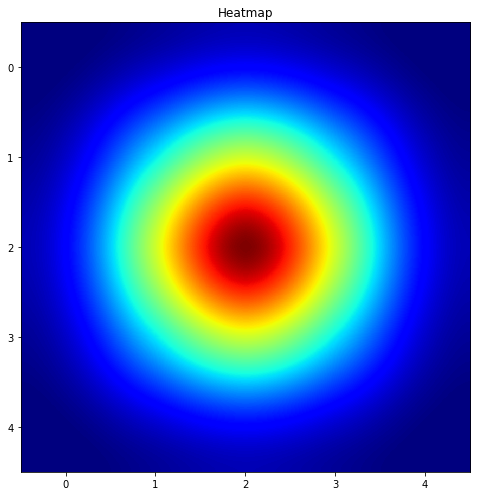

In [17]:
heatmap(grid, cmap='jet', interpolation='spline16')

In [18]:
directions8

{'W': (-1, 0),
 'N': (0, 1),
 'E': (1, 0),
 'S': (0, -1),
 'NW': (-1, 1),
 'NE': (1, 1),
 'SE': (1, -1),
 'SW': (-1, -1)}

In [19]:
problem = PeakFindingProblem(initial, grid, directions8)

In [20]:
%%timeit
solutions = {problem.value(simulated_annealing(problem)) for i in range(100)}

164 ms ± 5.9 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [21]:
max(solutions)

9

In [22]:
%%timeit
solutions = problem.value(hill_climbing(problem))

55.3 µs ± 1.02 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [23]:
solutions

{1, 2, 3, 5, 7, 8, 9}

In [24]:
grid = [[0, 0, 0, 1, 4], 
        [0, 0, 2, 8, 10], 
        [0, 0, 2, 4, 12], 
        [0, 2, 4, 8, 16], 
        [1, 4, 8, 16, 32]]

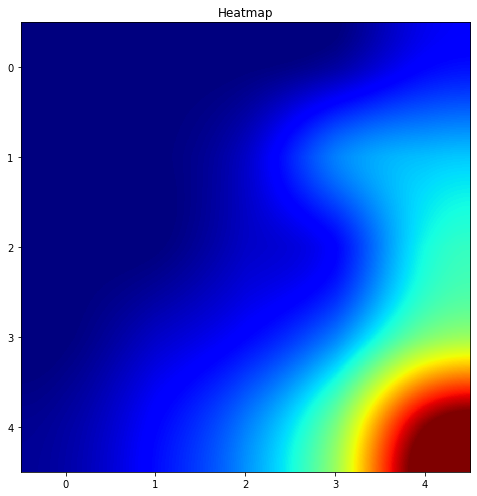

In [25]:
heatmap(grid, cmap='jet', interpolation='spline16')

In [26]:
problem = PeakFindingProblem(initial, grid, directions8)

In [27]:
solution = problem.value(hill_climbing(problem))

In [28]:
solution

0

In [29]:
solutions = {problem.value(simulated_annealing(problem)) for i in range(100)}
max(solutions)

32

## GENETIC ALGORITHM

In [3]:
u_case = [chr(x) for x in range(65, 91)]
l_case = [chr(x) for x in range(97, 123)]

gene_pool = []
gene_pool.extend(u_case)
gene_pool.extend(l_case)
gene_pool.append(' ')

In [4]:
max_population = 100

In [5]:
mutation_rate = 0.07

In [6]:
def fitness_fn(sample):
    fitness = 0
    for i in range(len(sample)):
        if sample[i] == target[i]:
            fitness += 1
    return fitness

In [7]:
target = 'Genetic Algorithm'

In [8]:
population = init_population(max_population, gene_pool, len(target))

In [9]:
parents = select(2, population, fitness_fn)

In [10]:
child = recombine(*parents)

In [11]:
child = mutate(child, gene_pool, mutation_rate)

In [12]:
population = [mutate(recombine(*select(2, population, fitness_fn)), gene_pool, mutation_rate) for i in range(len(population))]

In [13]:
current_best = max(population, key=fitness_fn)

In [14]:
print(current_best)

['L', 'u', 'b', 'k', 'O', 'r', 'c', 'x', 'z', 'h', 'p', 'q', 'd', 'P', 's', 'h', 'U']


In [15]:
current_best_string = ''.join(current_best)
print(current_best_string)

mehZKssgoOMEfxthr


In [16]:
ngen = 1200
f_thres = len(target)

In [17]:
def genetic_algorithm_stepwise(population, fitness_fn, gene_pool=[0, 1], f_thres=None, ngen=1200, pmut=0.1):
    for generation in range(ngen):
        population = [mutate(recombine(*select(2, population, fitness_fn)), gene_pool, pmut) for i in range(len(population))]
        current_best = ''.join(max(population, key=fitness_fn))
        print(f'Current best: {current_best}\t\tGeneration: {str(generation)}\t\tFitness: {fitness_fn(current_best)}\r', end='')
        
        fitness_indivisual = fitness_threshold(fitness_fn, f_thres, population)
        
        if fitness_indivisual:
            return fitness_indivisual, generation
    return max(population, key=fitness_fn), generation

In [18]:
population = init_population(max_population, gene_pool, len(target))
solution, generations = genetic_algorithm_stepwise(population, fitness_fn, gene_pool, f_thres, ngen, mutation_rate)

In [19]:
edges = {
    'A': [0, 1],
    'B': [0, 3],
    'C': [1, 2],
    'D': [2, 3]
}

In [20]:
population = init_population(8, ['R', 'G'], 4)
population

[['R', 'G', 'G', 'R'],
 ['R', 'G', 'R', 'G'],
 ['R', 'G', 'R', 'G'],
 ['G', 'R', 'R', 'G'],
 ['R', 'R', 'G', 'G'],
 ['R', 'R', 'G', 'G'],
 ['G', 'G', 'R', 'G'],
 ['G', 'R', 'G', 'G']]

In [21]:
def fitness(c):
    return sum(c[n1] != c[n2] for (n1, n2) in edges.values())

In [22]:
solution = genetic_algorithm(population, fitness, gene_pool=['R', 'G'])
solution

['R', 'G', 'R', 'G']

In [23]:
fitness(solution)

4

In [15]:
population = init_population(100, range(8), 8)
population[:5]

[[0, 3, 5, 6, 7, 0, 1, 3],
 [0, 2, 2, 4, 5, 3, 4, 6],
 [3, 3, 5, 2, 6, 7, 4, 2],
 [0, 1, 3, 3, 2, 3, 5, 1],
 [3, 0, 1, 0, 3, 5, 5, 0]]

In [16]:
def fitness(q):
    non_attacking = 0
    for row1 in range(len(q)):
        for row2 in range(row1+1, len(q)):
            col1 = int(q[row1])
            col2 = int(q[row2])
            row_diff = row1 - row2
            col_diff = col1 - col2
            
            if col1 != col2 and row_diff != col_diff and row_diff != -col_diff:
                non_attacking += 1
    return non_attacking

In [17]:
solution = genetic_algorithm(population, fitness, f_thres=25, gene_pool=range(8))
print(solution)
print(fitness(solution))

[3, 5, 0, 5, 1, 4, 1, 3]
25


In [18]:
nqp = NQueensProblem(8)

In [19]:
%%timeit
depth_first_tree_search(nqp)

1.57 ms ± 49.1 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [20]:
dfts = depth_first_tree_search(nqp).solution()

/home/onimas/develop/github/learning_programing_list/agent_program/img.py:167: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


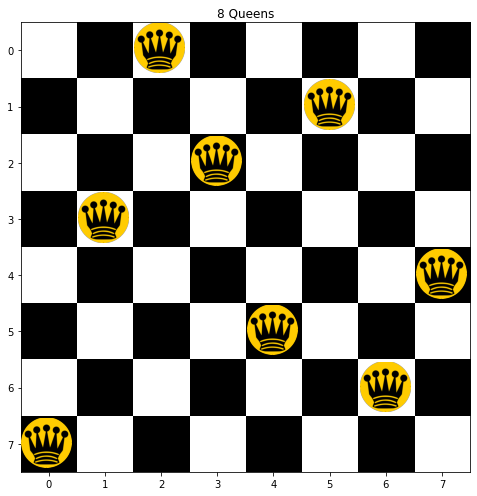

In [21]:
plot_NQueens(dfts)